# Задача №4

![image.png](images/problem4.png)

Подключаем необходимые библиотеки

In [1]:
import numpy as np
import matplotlib.pyplot as plt

$$I = \int_{a}^{b}{f(x)dx} \approx \frac{h}{3}\left[f(x_0) + f(x_N) + 4 \sum_{i=1}^{n-1} f(x_{2i}) + 2 \sum_{i=1}^{n} f(x_{2i-1})\right]$$

In [2]:
def simpson_integral(f, a, b, n):
    if n % 2 == 1:
        n += 1  # n должно быть четным для метода Симпсона
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x) 
    S = y[0] + y[-1] + 4 * np.sum(y[1:n:2]) + 2 * np.sum(y[2:n-1:2])
    return S * h / 3



$$f(x) = \sin(x)$$
$$I = \int_{0}^{\pi}{\sin(x)dx} = 2$$

In [3]:
def func_test(x):
    return np.sin(x)

$$a = 0, \quad b = \pi$$
$$h = \frac{b - a}{n}$$

$$M_4 = max|f^{(VI)}(\xi)| = 1, \quad \xi \in [a, b]$$
$$\tilde{R} = \frac{(b - a)h^4}{180}M_4 = \frac{\pi}{180}h^4$$
где $\tilde{R}$ наибольшее возможное отклонение от истинного результата

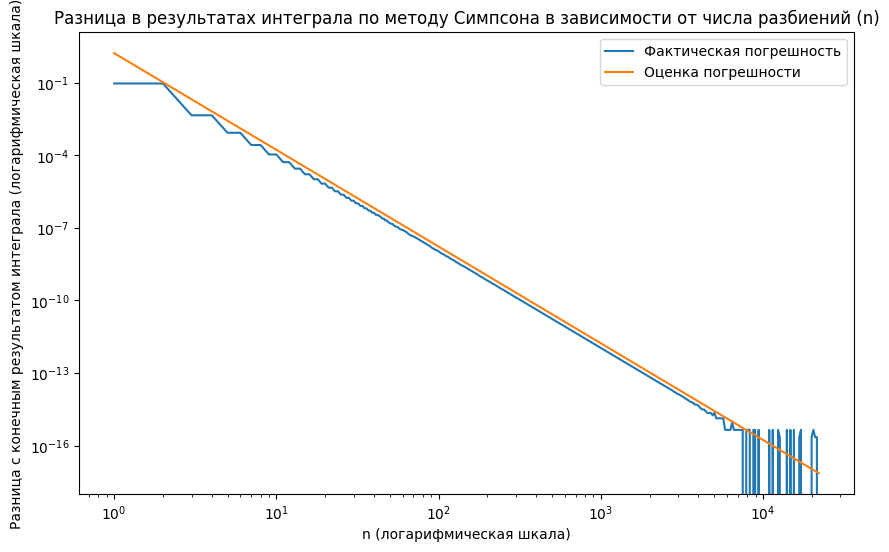

In [4]:
result_test = np.float32(2) # значение интеграла посчитанное аналитически

M4 = 1 # наибольшее значение 4 производной на интервале вычесленное аналитически

a = 0
b = np.pi
# Создание списка значений n с использованием экспоненциальной шкалы
n_values = np.int64(np.exp(np.linspace(0, 10, num=400)))  # 40 точек между 0 и 19 по логарифмической шкале
h = (b - a) / n_values
R = (b - a) * h**4 / 180 * M4
# Вычисление интегралов
results_test = []
for n in n_values:
    value = simpson_integral(func_test, a, b, n)
    results_test.append(value)


# Вычисление разностей между результатом для самого большого n и результатами для других значений n
differences = np.abs(result_test - results_test)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(n_values, differences, label="Фактическая погрешность")
plt.plot(n_values, R, label="Оценка погрешности")

plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('n (логарифмическая шкала)')
plt.ylabel('Разница с конечным результатом интеграла (логарифмическая шкала)')
plt.title('Разница в результатах интеграла по методу Симпсона в зависимости от числа разбиений (n)')
plt.show()


Из графика видно, что при $n$ около $10^4$ достигается предел машинной точности

## Вычисление интегралов
## Часть 1

$$I_a = \int_{0}^{1} \frac{\sin(\pi x^5)}{x^5 (1 - x)} \, dx$$

In [5]:
def func_a(x):
    return np.sin(np.pi * x**5) / (x**5 * (1 - x))

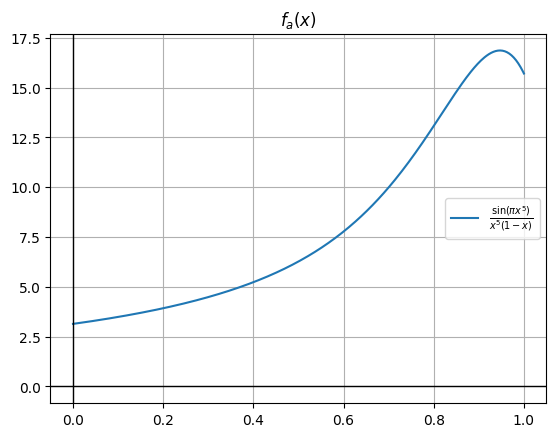

In [6]:
count = 400 # количество точек используемное для построения графика
shift = 1e-5 # сдвиг во избежание деления на ноль
x = np.linspace(0 + shift, 1 - shift, count)

y = func_a(x)

plt.plot(x, y, label=r"$\frac{\sin(\pi x^5)}{x^5 (1 - x)}$")

plt.title(r'$f_a(x)$')
plt.grid(True) 
plt.axhline(y=0, color='black', linewidth=1)
plt.axvline(x=0, color='black', linewidth=1)
plt.legend()

plt.show()

In [9]:
shift = 1e-16
a = 0 + shift
b = 1 - shift

result = simpson_integral(func_a, a, b, n=np.int64(4e7))

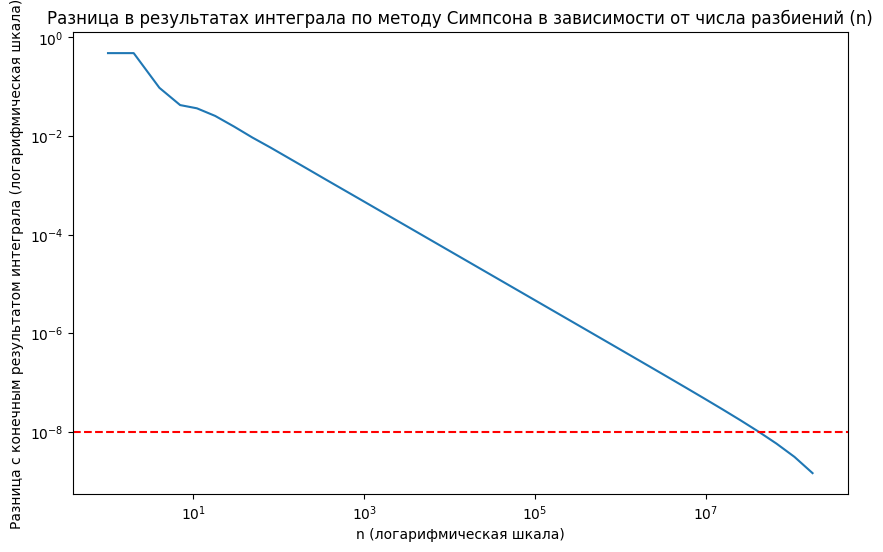

In [ ]:
# Создание списка значений n с использованием экспоненциальной шкалы
n_values = np.int64(np.exp(np.linspace(0, 19, num=40)))  # 40 точек между 0 и 19 по логарифмической шкале

# Вычисление интегралов
results = []
for n in n_values:
    value = simpson_integral(func_a, a, b, n)
    results.append(value)

# Вычисление разностей между результатом для самого большого n и результатами для других значений n
differences = np.abs(result - results)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(n_values, differences)
plt.axhline(y=1e-8, color='r', linestyle='--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('n (логарифмическая шкала)')
plt.ylabel('Разница с конечным результатом интеграла (логарифмическая шкала)')
plt.title('Разница в результатах интеграла по методу Симпсона в зависимости от числа разбиений (n)')
plt.show()


Аппроксимируя данную зависимость прямой, получим фактический порядок аппроксимации около 1, это связано с тем, что функция не деффиринцируема на границах отрезка, а её 4 производная не ограничена на интервале, поэтому оценка погрешности не работает

In [ ]:
# корректнее было бы построить модель линейной регрессии,
# но для простоты расчитаем угловой коэффициент прямой в логарифмических координатах по двум точкам
i = 5
j = 35
dy = np.log(differences[i]) - np.log(differences[j])
dx = np.log(n_values[i]) - np.log(n_values[j])
p = -dy/dx
p

0.9941564946413939

Наименьшее число $n$, для которого достигается необходимая точность

In [ ]:
n_values[np.where(differences < 1e-8)[0][0]]

4191

In [10]:
print(f"Ответ: {result}")
# 8.03491067542 

Ответ: 8.034910687042688


Добавочная погрешность за счет использования открезка $[a + \epsilon, b - \epsilon]$, вместо $[a, b]$

In [12]:
x = np.linspace(a, b, n)
y = func_a(x)
max_abs = np.max(np.abs(y)) # оценим значение функции наибольшим по модулю значением на интервале
2 * max_abs * shift

3.4206127547320213e-15

## Часть 2

$$I_b = \int_{0}^{\infty} e^{-\sqrt{x} + \sin\left(\frac{x}{10}\right)} \, dx$$

In [27]:
def func_b(x):
    return np.exp(-np.sqrt(x) + np.sin(x / 10))

Сделаем замену, чтобы перейти к отрезку конечной длины

$$ x = \frac{t}{1 - t} $$

$$ I = \int_{0}^{\infty} f(x) \, dx = \int_{0}^{1} \frac{f(x(t)) \, dt}{(1 - t)^2} $$

In [28]:
def func_b_finite(t):
    x = t / (1 - t)
    return func_b(x) / (1 - t)**2

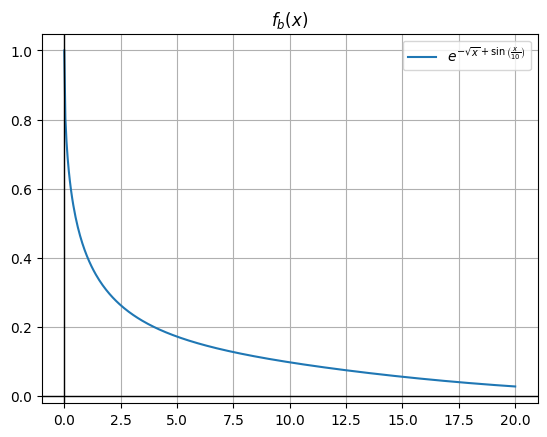

In [29]:
count = 400 # количество точек используемное для построения графика
max_value = 20 # правая граница при построение графика
x = np.linspace(0, max_value, count)

y = func_b(x)

plt.plot(x, y, label=r"$e^{-\sqrt{x} + \sin\left(\frac{x}{10}\right)}$")

plt.title(r'$f_b(x)$')
plt.grid(True) 
plt.axhline(y=0, color='black', linewidth=1)
plt.axvline(x=0, color='black', linewidth=1)
plt.legend()

plt.show()

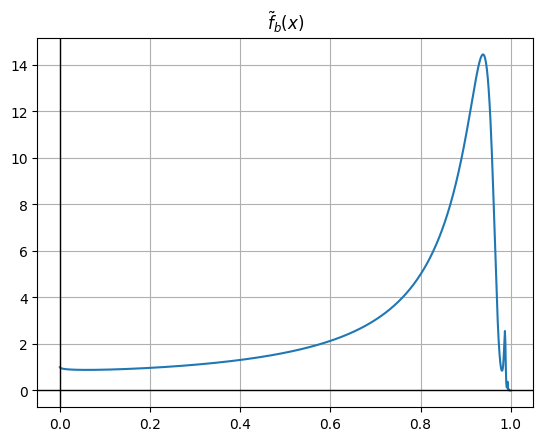

In [30]:
count = 1000 # количество точек используемное для построения графика
shift = 1e-16
a = 0
b = 1 - shift
x = np.linspace(a, b, count)

y = func_b_finite(x)

plt.plot(x, y)

plt.title(r'$\tilde{f}_b(x)$')
plt.grid(True) 
plt.axhline(y=0, color='black', linewidth=1)
plt.axvline(x=0, color='black', linewidth=1)

plt.show()

In [31]:
result = simpson_integral(func_b_finite, a, b, n=np.int64(1e8))

2.9810034525584146

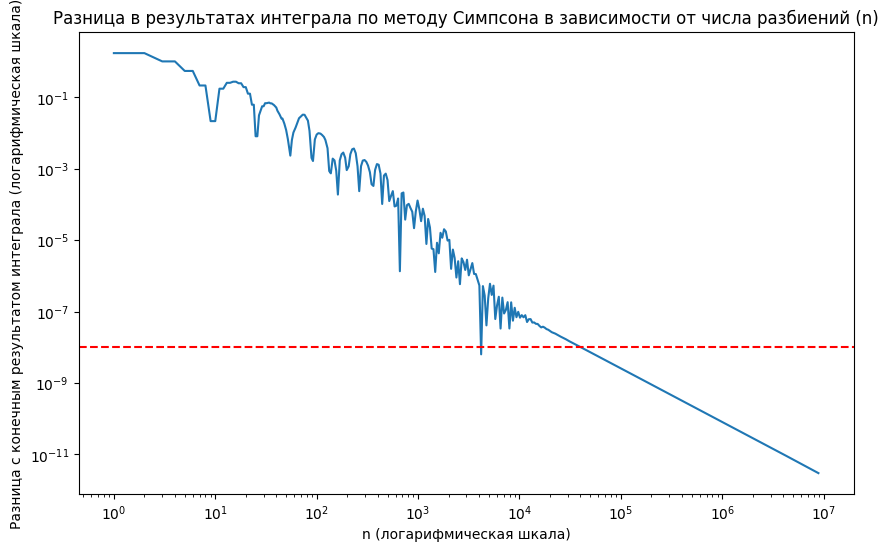

In [32]:
# Создание списка значений n с использованием экспоненциальной шкалы
n_values = np.int64(np.exp(np.linspace(0, 16, num=400)))  # 400 точек между 0 и 16 по логарифмической шкале

# Вычисление интегралов
results = []
for n in n_values:
    result = simpson_integral(func_b_finite, a, b, n)
    results.append(result)

# Вычисление разностей между результатом для самого большого n и результатами для других значений n
differences = np.abs(result - results)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(n_values, differences)
plt.axhline(y=1e-8, color='r', linestyle='--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('n (логарифмическая шкала)')
plt.ylabel('Разница с конечным результатом интеграла (логарифмическая шкала)')
plt.title('Разница в результатах интеграла по методу Симпсона в зависимости от числа разбиений (n)')
plt.show()


Колебания связаны с тем, что после замены функция содержит колебания высокой амплитуды в окресности единицы, и при недостаточно большом $n$ эти колебания не могут быть должным образом проинтегрированы

Как и в предыдущем случае порядок аппроксимации около 1.5 что меньше 4, по тем же причинам

In [37]:
i = 250 # выбираем отрезок на котором колебания прекратились и зависимость имеет линейный характер
j = 350
dy = np.log(differences[i]) - np.log(differences[j])
dx = np.log(n_values[i]) - np.log(n_values[j])
p = -dy/dx
p

1.5022448423712045

In [40]:
print(f"Ответ: {result}")

Ответ: 2.9810034525584146
